<center><font color="green" size="5">Pubg game prediction</font></center>


<img src="download.gif">


Table Content
1. [importing Libraries](#import)
2. [Reading Data](#Read)


importing Libraries <a id="import" class="anchor"></a>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#for ignoring warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
Data=pd.read_csv("PUBG_Game_Prediction_data.csv")
Data.head()
df=pd.DataFrame(Data)
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [3]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

### PUBG Data Description


In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.
You are provided with a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 players per group.


● DBNOs - Number of enemy players knocked.  
● assists - Number of enemy players this player damaged that were killed by teammates.  
● boosts - Number of boost items used.  
● damageDealt - Total damage dealt. Note: Self-inflicted damage is subtracted.  
● headshotKills - Number of enemy players killed with headshots.  
● heals - Number of healing items used.  
● Id - Player’s Id  
● killPlace - Ranking in the match of the number of enemy players killed.  
● killPoints - Kills-based external ranking of players. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a "None".  
● killStreaks - Max number of enemy players killed in a short amount of time.  
● kills - Number of enemy players killed.  
● longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.  
● matchDuration - Duration of the match in seconds.  
● matchId - ID to identify matches. There are no matches that are in both the training and testing set.  
● matchType - String identifying the game mode that the data comes from. The standard modes are "solo", "duo", "squad", "solo-fpp", "duo-fpp", and "squad-fpp"; other modes are from events or custom matches.  
● rankPoints - Elo-like ranking of players. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. A value of -1 takes the place of "None".  
● revives - Number of times this player revived teammates.  
● rideDistance - Total distance traveled in vehicles measured in meters.  
● roadKills - Number of kills while in a vehicle.  
● swimDistance - Total distance traveled by swimming measured in meters.  
● teamKills - Number of times this player killed a teammate.  
● vehicleDestroys - Number of vehicles destroyed.  
● walkDistance - Total distance traveled on foot measured in meters.  
● weaponsAcquired - Number of weapons picked up.  
● winPoints - Win-based external ranking of players. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a "None".  
● groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.  
● numGroups - Number of groups we have data for in the match.  
● maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.  
● winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to the last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# Data Wrangling 

Checking missing values 

In [4]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [5]:
df['winPlacePerc'].isnull().sum()

1

In [6]:
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [7]:
df.drop(2744604,inplace=True)

In [8]:
df['winPlacePerc'].isnull().sum()

0

# Understanding players distribution

these are new parameter to know how many players in game

In [9]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [10]:
df["PlayersJoined"] = df.groupby("matchId")["matchId"].transform("count")


In [11]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


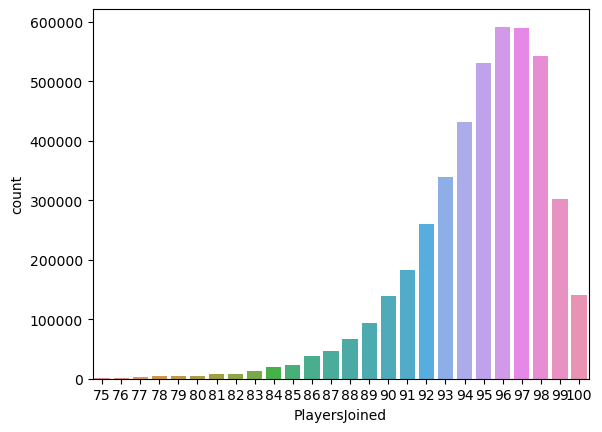

In [12]:
sns.countplot(data=df[df["PlayersJoined"] >= 75], x="PlayersJoined")
plt.show()

# Analysis Data

killing without moving ?

<img src="pubg-road-kill.gif">



In [13]:
# prepare New Parameter for Totaldistance Traveled

In [14]:
df["Totaldistance"]=df["rideDistance"]+df["swimDistance"]+df["walkDistance"]
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersJoined,Totaldistance
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.00,0,0,244.80,1,1466,0.4444,96,244.8000
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,11.04,0,0,1434.00,5,0,0.6400,91,1445.0445
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.00,0,0,161.80,2,0,0.7755,98,161.8000
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.00,0,0,202.70,3,0,0.1667,91,202.7000
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.00,0,0,49.75,2,0,0.1875,97,49.7500


killing without Moving

In [15]:
df["killed without Moving"] = (df["kills"] > 0) & (df["Totaldistance"] == 0)
df


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersJoined,Totaldistance,killed without Moving
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.000,0,0,244.80,1,1466,0.4444,96,244.8000,False
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,11.040,0,0,1434.00,5,0,0.6400,91,1445.0445,False
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.000,0,0,161.80,2,0,0.7755,98,161.8000,False
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.000,0,0,202.70,3,0,0.1667,91,202.7000,False
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.000,0,0,49.75,2,0,0.1875,97,49.7500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0.000,0,0,1019.00,3,1507,0.1786,94,2311.0000,False
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0.000,0,0,81.70,6,0,0.2935,93,81.7000,False
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,2.184,0,0,788.70,4,0,0.4815,98,790.8840,False
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0.000,0,0,2748.00,8,0,0.8000,94,2748.0000,False


In [16]:
df[df["killed without Moving"]==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersJoined,Totaldistance,killed without Moving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [17]:
df[df["killed without Moving"]==True].shape

(1535, 32)

Total 1535 killed without moving

In [18]:
df[df["killed without Moving"]==True].index

Int64Index([   1824,    6673,   11892,   14631,   15591,   20881,   23298,
              24640,   25659,   30079,
            ...
            4426500, 4429697, 4432954, 4436511, 4437516, 4440232, 4440898,
            4440927, 4441511, 4446682],
           dtype='int64', length=1535)

In [19]:
df.drop(df[df["killed without Moving"] == True].index, inplace=True)


In [20]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersJoined,Totaldistance,killed without Moving
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.000,0,0,244.80,1,1466,0.4444,96,244.8000,False
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,11.040,0,0,1434.00,5,0,0.6400,91,1445.0445,False
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.000,0,0,161.80,2,0,0.7755,98,161.8000,False
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.000,0,0,202.70,3,0,0.1667,91,202.7000,False
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.000,0,0,49.75,2,0,0.1875,97,49.7500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0.000,0,0,1019.00,3,1507,0.1786,94,2311.0000,False
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0.000,0,0,81.70,6,0,0.2935,93,81.7000,False
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,2.184,0,0,788.70,4,0,0.4815,98,790.8840,False
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0.000,0,0,2748.00,8,0,0.8000,94,2748.0000,False


how many road-kills, it's extra-ordinary kills

In [21]:
df[df['roadKills']>5].shape

(46, 32)

46 in the category of extra-ordinary kills

<img src="giphy.gif.crdownload">


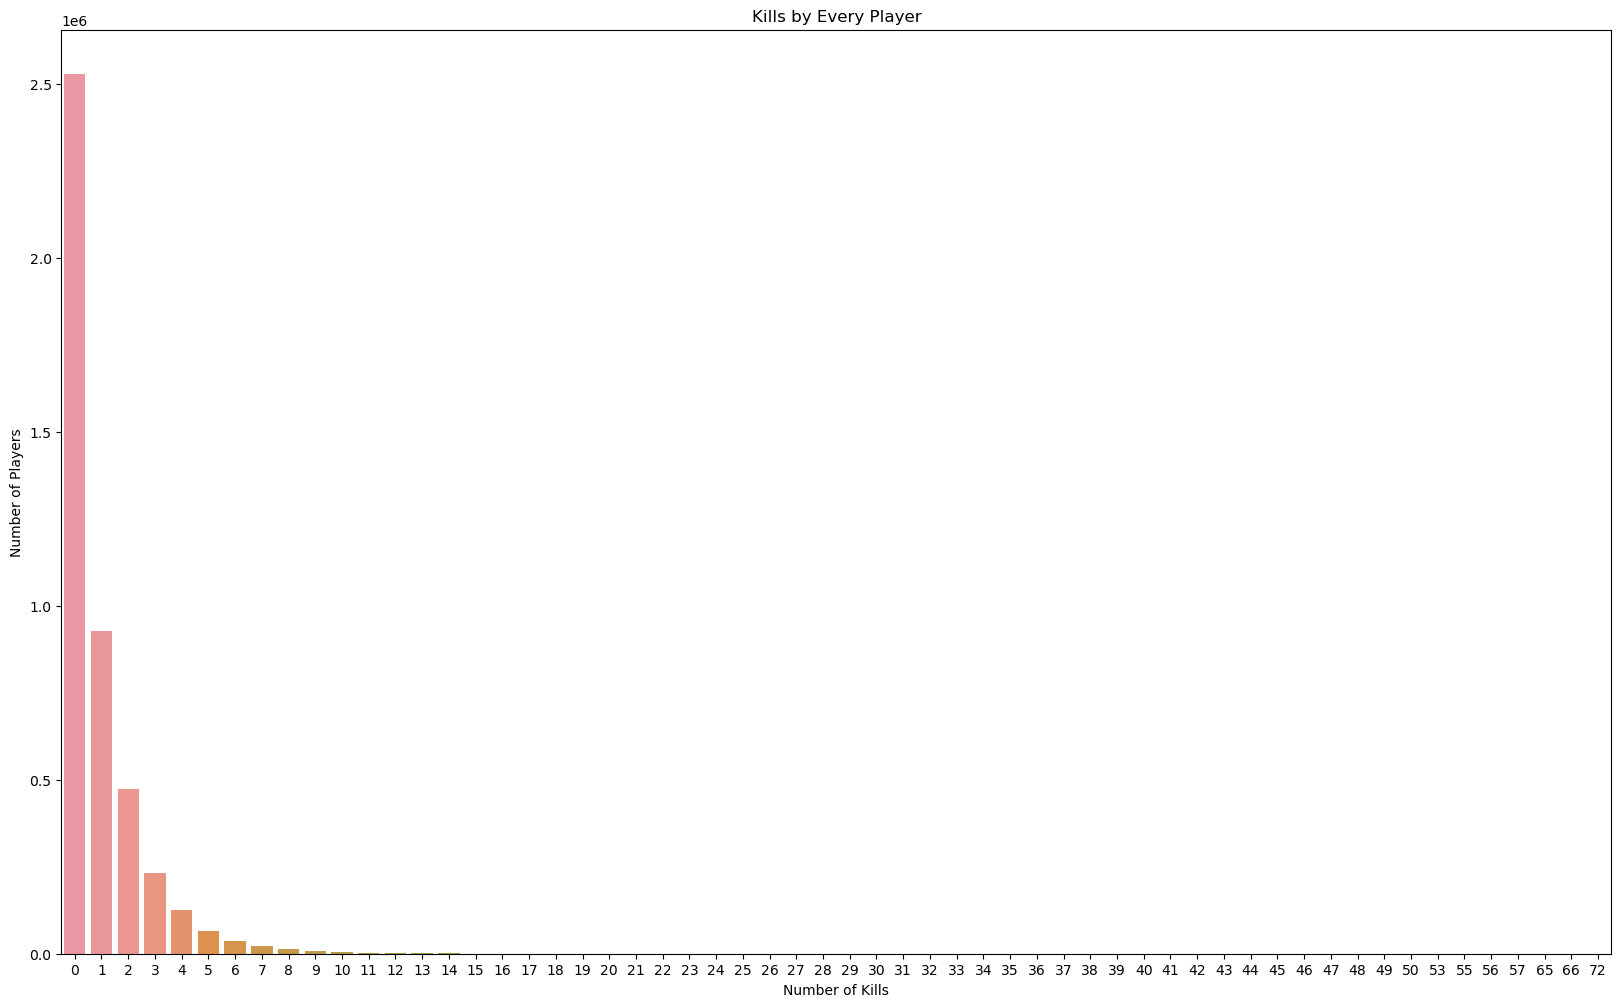

In [22]:
plt.figure(figsize=(20, 12))
sns.countplot(data=df, x=df["kills"])
plt.title("Kills by Every Player")
plt.ylabel("Number of Players")
plt.xlabel("Number of Kills")
plt.show()



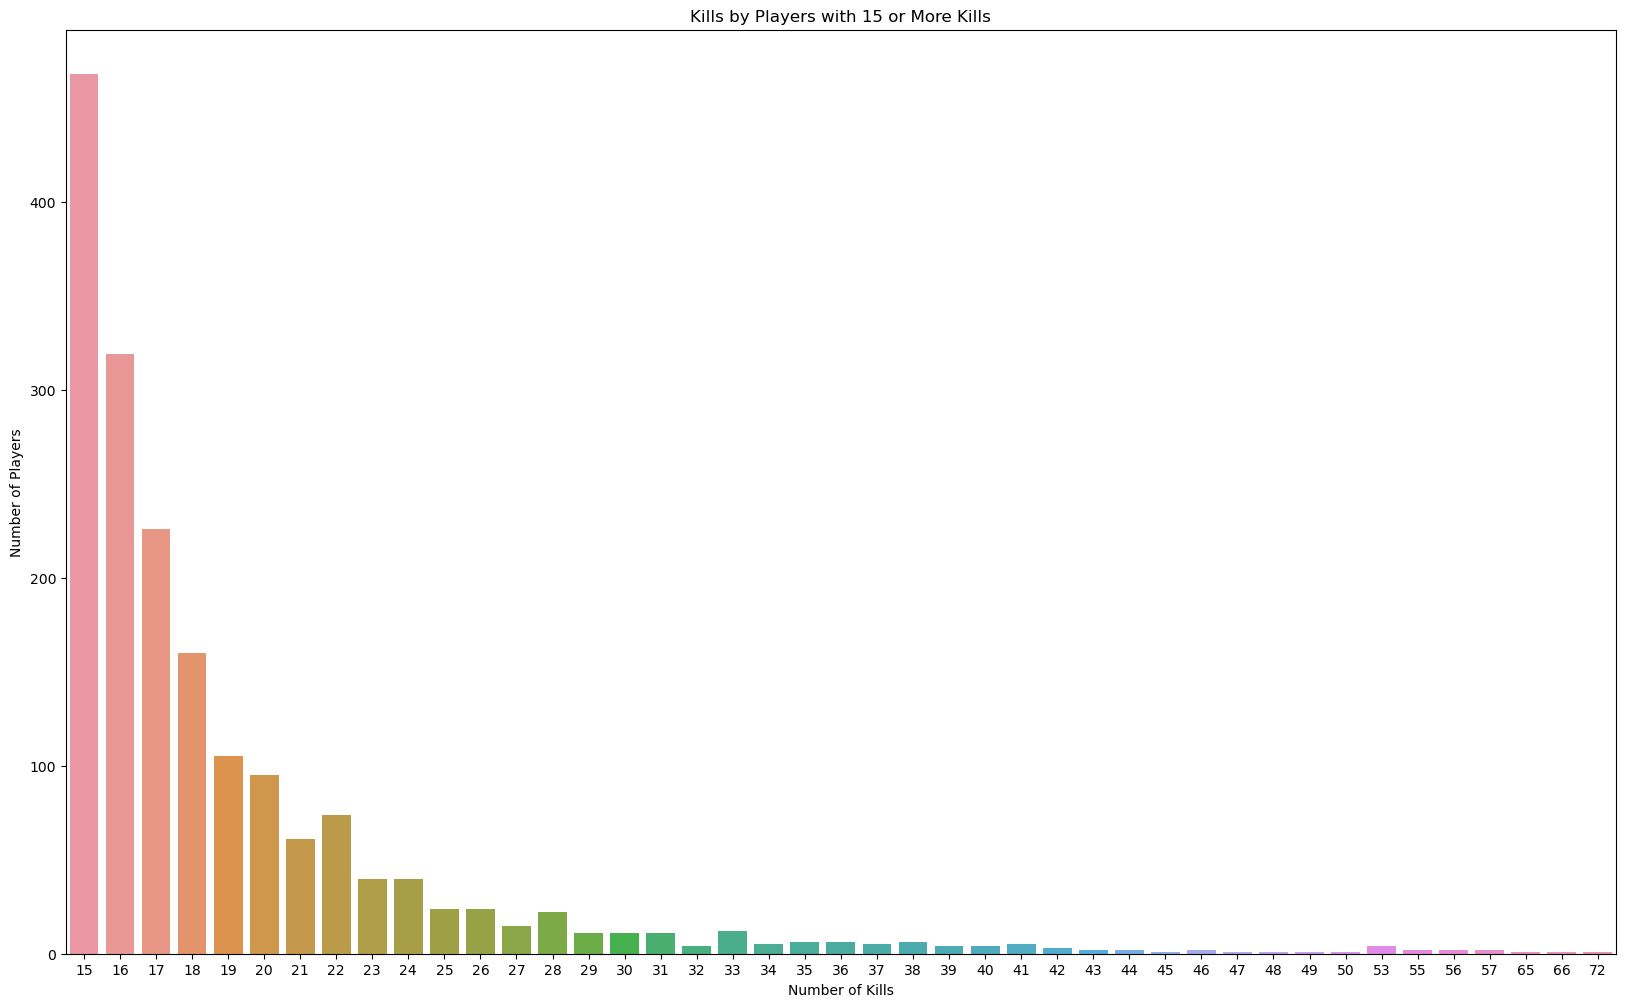

In [23]:
plt.figure(figsize=(20, 12))
sns.countplot(data=df[df["kills"]>=15], x="kills")
plt.title("Kills by Players with 15 or More Kills")
plt.ylabel("Number of Players")
plt.xlabel("Number of Kills")
plt.show()


In [24]:
df.drop(df[df['kills']>15].index, inplace=True)
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersJoined,Totaldistance,killed without Moving
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.000,0,0,244.80,1,1466,0.4444,96,244.8000,False
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,11.040,0,0,1434.00,5,0,0.6400,91,1445.0445,False
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.000,0,0,161.80,2,0,0.7755,98,161.8000,False
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.000,0,0,202.70,3,0,0.1667,91,202.7000,False
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.000,0,0,49.75,2,0,0.1875,97,49.7500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0.000,0,0,1019.00,3,1507,0.1786,94,2311.0000,False
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0.000,0,0,81.70,6,0,0.2935,93,81.7000,False
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,2.184,0,0,788.70,4,0,0.4815,98,790.8840,False
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0.000,0,0,2748.00,8,0,0.8000,94,2748.0000,False


<img src="48557633fc6500f5c3cc5cfbbe80d547.jpg">



headshots

In [25]:
df["headshot_rate"]=df["headshotKills"]/df["kills"]
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersJoined,Totaldistance,killed without Moving,headshot_rate
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0,244.80,1,1466,0.4444,96,244.8000,False,NaN
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0,1434.00,5,0,0.6400,91,1445.0445,False,NaN
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0,161.80,2,0,0.7755,98,161.8000,False,NaN
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0,202.70,3,0,0.1667,91,202.7000,False,NaN
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0,49.75,2,0,0.1875,97,49.7500,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,0,1019.00,3,1507,0.1786,94,2311.0000,False,NaN
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0,81.70,6,0,0.2935,93,81.7000,False,NaN
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0,788.70,4,0,0.4815,98,790.8840,False,NaN
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0,0,2748.00,8,0,0.8000,94,2748.0000,False,0.5


In [26]:
df['headshot_rate']=df['headshot_rate'].fillna(0)
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersJoined,Totaldistance,killed without Moving,headshot_rate
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0,244.80,1,1466,0.4444,96,244.8000,False,0.0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0,1434.00,5,0,0.6400,91,1445.0445,False,0.0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0,161.80,2,0,0.7755,98,161.8000,False,0.0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0,202.70,3,0,0.1667,91,202.7000,False,0.0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0,49.75,2,0,0.1875,97,49.7500,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,0,1019.00,3,1507,0.1786,94,2311.0000,False,0.0
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0,81.70,6,0,0.2935,93,81.7000,False,0.0
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0,788.70,4,0,0.4815,98,790.8840,False,0.0
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0,0,2748.00,8,0,0.8000,94,2748.0000,False,0.5


In [27]:
df[df['headshot_rate']==1]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersJoined,Totaldistance,killed without Moving,headshot_rate
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.0,1,1,0,44,...,0,0,34.70,1,0,0.0370,95,34.70,False,1.0
22,9b2961d4d51f91,799d0a4d61dc3c,e833ca2282169d,0,1,192.3,1,2,3,15,...,0,0,1264.00,4,1494,0.7500,97,3596.00,False,1.0
42,ca3c89d8045645,7c0f298b843115,ecdfcc7fb07cfc,0,0,245.6,2,1,0,46,...,0,0,52.52,1,0,0.0357,95,52.52,False,1.0
59,d551381427e157,39d3a3acbe38d7,5a5d23025129e2,0,2,100.0,0,1,2,29,...,0,0,1606.00,5,0,0.6809,95,1606.00,False,1.0
77,5d8016d7aa9437,9da0fb0be19117,b4d329043d5c60,2,1,243.1,1,1,1,29,...,0,0,1749.00,4,0,0.7609,94,1749.00,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446908,ab2138a2636da6,d953ca7febc96d,e8f187f8e42816,0,2,121.6,1,1,1,23,...,0,0,4245.00,4,0,0.8889,98,4697.36,False,1.0
4446914,6c26ec486ba215,0d79a7b4ce010a,cdb99ef70f81fb,0,0,100.0,1,1,0,37,...,0,0,208.50,2,1486,0.2414,91,208.50,False,1.0
4446936,ee62630c3a17e3,cc6b1b4264eb73,269a041abb69a5,0,1,68.2,0,1,1,22,...,0,0,2708.00,7,0,0.7308,96,2742.86,False,1.0
4446937,68100cdb23f1f0,9b8970931c5d00,ce5a23d8bb7883,1,2,127.4,1,1,4,31,...,0,0,1364.00,5,0,0.7111,91,1364.00,False,1.0


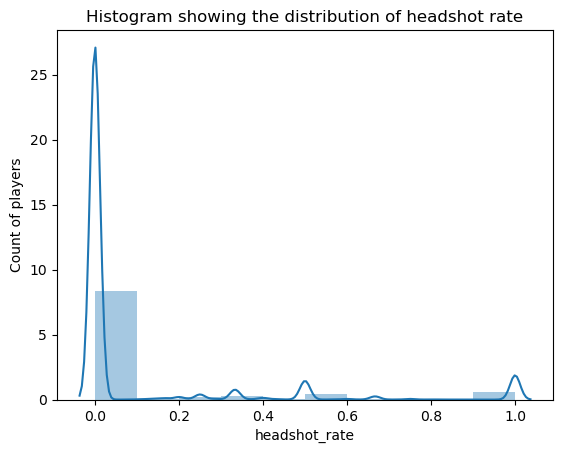

In [28]:
sns.distplot(df['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()


if all kills are headshots then it is anomaly 

In [29]:
df[(df['headshot_rate'] == 1) & (df['kills'] >5)].index


Int64Index([  43791,   45447,   66266,  102499,  104571,  140178,  141081,
             172442,  187499,  281570,
            ...
            4351048, 4359350, 4362787, 4365630, 4387092, 4408299, 4417654,
            4428741, 4433196, 4435035],
           dtype='int64', length=187)

In [30]:
df.drop(df[(df['headshot_rate'] == 1) & (df['kills'] >5)].index, inplace=True)
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersJoined,Totaldistance,killed without Moving,headshot_rate
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0,244.80,1,1466,0.4444,96,244.8000,False,0.0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0,1434.00,5,0,0.6400,91,1445.0445,False,0.0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0,161.80,2,0,0.7755,98,161.8000,False,0.0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0,202.70,3,0,0.1667,91,202.7000,False,0.0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0,49.75,2,0,0.1875,97,49.7500,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,0,1019.00,3,1507,0.1786,94,2311.0000,False,0.0
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0,81.70,6,0,0.2935,93,81.7000,False,0.0
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0,788.70,4,0,0.4815,98,790.8840,False,0.0
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0,0,2748.00,8,0,0.8000,94,2748.0000,False,0.5


Largest shot

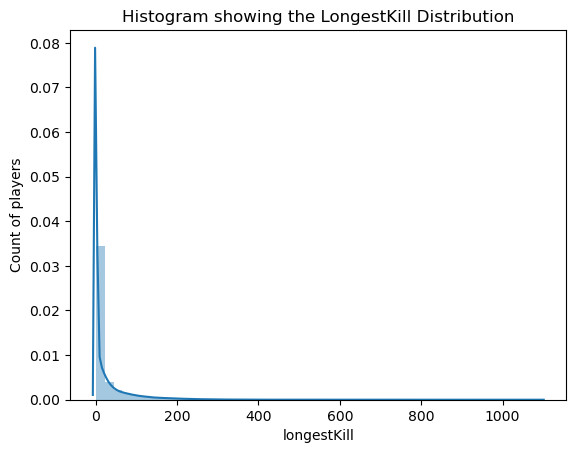

In [31]:
sns.distplot(df['longestKill'], bins = 50).set_title("Histogram showing the LongestKill Distribution")
plt.ylabel("Count of players")
plt.show()

In [32]:
df[df['longestKill']>500].shape # anomaly condition

(1684, 33)

In [33]:
df[df['longestKill']>500].index

Int64Index([   4538,   25333,   29129,   41358,   43529,   47172,   51716,
              56025,   64618,   69161,
            ...
            4411144, 4420794, 4430133, 4433326, 4434733, 4435955, 4436217,
            4436871, 4438550, 4440973],
           dtype='int64', length=1684)

In [34]:
df.drop(df[df['longestKill']>500].index, inplace=True)
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersJoined,Totaldistance,killed without Moving,headshot_rate
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0,244.80,1,1466,0.4444,96,244.8000,False,0.0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0,1434.00,5,0,0.6400,91,1445.0445,False,0.0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0,161.80,2,0,0.7755,98,161.8000,False,0.0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0,202.70,3,0,0.1667,91,202.7000,False,0.0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0,49.75,2,0,0.1875,97,49.7500,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,0,1019.00,3,1507,0.1786,94,2311.0000,False,0.0
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0,81.70,6,0,0.2935,93,81.7000,False,0.0
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0,788.70,4,0,0.4815,98,790.8840,False,0.0
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0,0,2748.00,8,0,0.8000,94,2748.0000,False,0.5


# Weapon Change

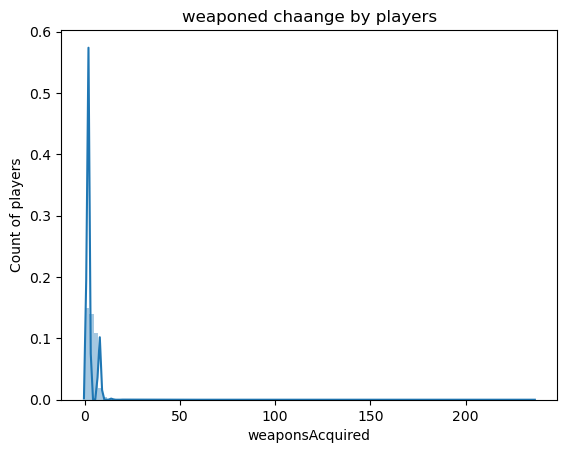

In [35]:
sns.distplot(df['weaponsAcquired'], bins =100)
plt.title("weaponed chaange by players")
plt.ylabel("Count of players")
plt.show()


In [36]:
df[df['weaponsAcquired']>15].shape # anomaly condition

(5058, 33)

In [37]:
df.drop(df[df['weaponsAcquired']>15].index, inplace=True)


# exploratory data analysis 

In [38]:
df.shape

(4437179, 33)

In [39]:
df.isnull().sum()

Id                       0
groupId                  0
matchId                  0
assists                  0
boosts                   0
damageDealt              0
DBNOs                    0
headshotKills            0
heals                    0
killPlace                0
killPoints               0
kills                    0
killStreaks              0
longestKill              0
matchDuration            0
matchType                0
maxPlace                 0
numGroups                0
rankPoints               0
revives                  0
rideDistance             0
roadKills                0
swimDistance             0
teamKills                0
vehicleDestroys          0
walkDistance             0
weaponsAcquired          0
winPoints                0
winPlacePerc             0
PlayersJoined            0
Totaldistance            0
killed without Moving    0
headshot_rate            0
dtype: int64

In [40]:
# correlation of parameter

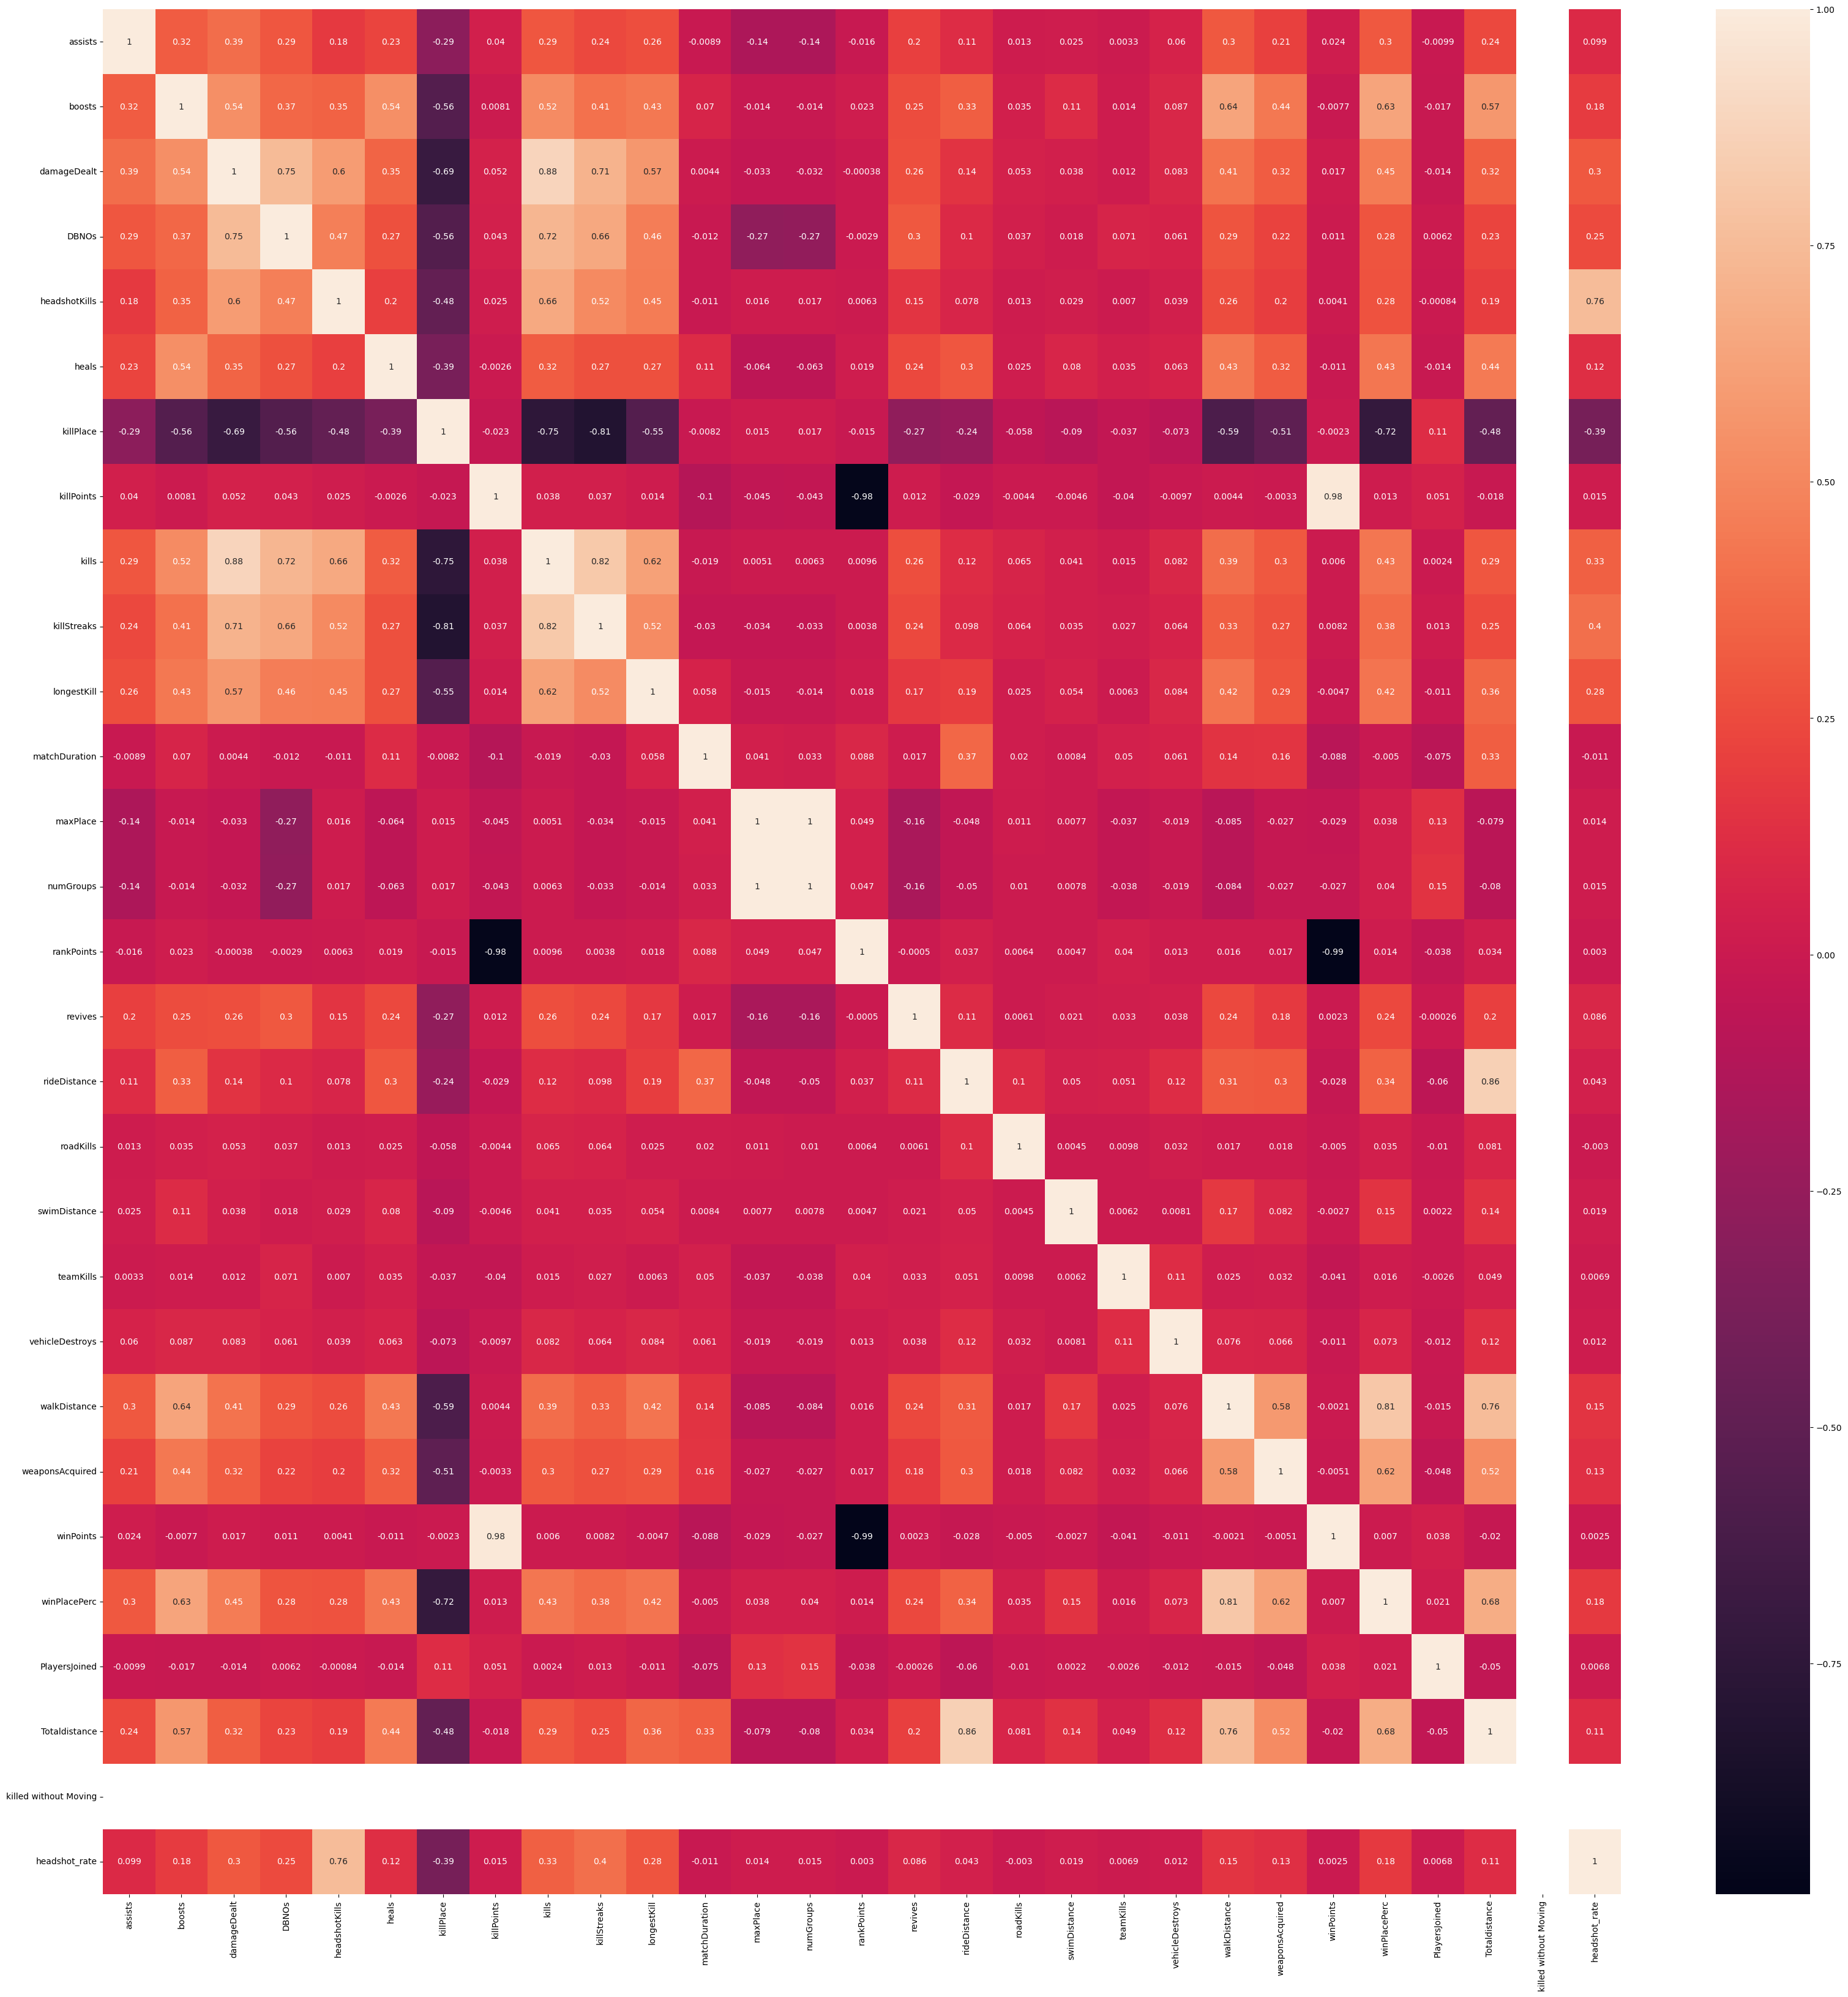

In [41]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Feature Engineering

In [42]:
normalizing_factor = (100 - df["PlayersJoined"]) / 100
print(normalizing_factor)


0          0.04
1          0.09
2          0.02
3          0.09
4          0.03
           ... 
4446961    0.06
4446962    0.07
4446963    0.02
4446964    0.06
4446965    0.02
Name: PlayersJoined, Length: 4437179, dtype: float64


In [43]:
df["PlayersJoined"]

0          96
1          91
2          98
3          91
4          97
           ..
4446961    94
4446962    93
4446963    98
4446964    94
4446965    98
Name: PlayersJoined, Length: 4437179, dtype: int64

In [44]:
df['kill_nor']=df['kills']*normalizing_factor
df['damageDealt_nor']=df['damageDealt']*normalizing_factor
df['matchDuration_nor']=df['matchDuration']*normalizing_factor
df["maxPlace_nor"]=df["maxPlace"]*normalizing_factor

In [45]:
df["traveldistance"]=df["rideDistance"]+df["swimDistance"]+df["walkDistance"]
df["heals_boost"]=df["heals"]+df["boosts"]
df["ply_assist"]=df["assists"]+df["revives"]


In [46]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'PlayersJoined',
       'Totaldistance', 'killed without Moving', 'headshot_rate', 'kill_nor',
       'damageDealt_nor', 'matchDuration_nor', 'maxPlace_nor',
       'traveldistance', 'heals_boost', 'ply_assist'],
      dtype='object')

In [47]:
# unnecessary parameters, don't require 

In [48]:
data=df.drop(columns=['Id', 'groupId', 'matchId', 'assists', 'boosts','swimDistance','walkDistance','rideDistance','heals','kills','revives','damageDealt','maxPlace','matchDuration'])

In [49]:
data

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,Totaldistance,killed without Moving,headshot_rate,kill_nor,damageDealt_nor,matchDuration_nor,maxPlace_nor,traveldistance,heals_boost,ply_assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,52.24,1.12,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,8.2323,159.93,2.34,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,1.3600,26.36,1.00,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,2.9610,129.24,2.79,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,0.03,3.0000,42.72,2.91,49.7500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,74,1029,0,0.00,squad-fpp,28,-1,0,...,2311.0000,False,0.0,0.00,0.0000,112.38,1.74,2311.0000,0,0
4446962,0,0,69,0,0,0.00,solo,93,1501,0,...,81.7000,False,0.0,0.00,3.0905,100.45,6.51,81.7000,1,0
4446963,0,0,66,0,0,0.00,squad-fpp,28,1500,0,...,790.8840,False,0.0,0.00,1.1812,26.42,0.56,790.8840,0,0
4446964,1,1,11,0,1,98.50,squad-fpp,25,1418,0,...,2748.0000,False,0.5,0.12,10.8240,82.38,1.56,2748.0000,6,2


In [50]:
data.columns

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'PlayersJoined', 'Totaldistance',
       'killed without Moving', 'headshot_rate', 'kill_nor', 'damageDealt_nor',
       'matchDuration_nor', 'maxPlace_nor', 'traveldistance', 'heals_boost',
       'ply_assist'],
      dtype='object')

# CatBoost Model prediction and evaluation


In [51]:
X=data.drop(["winPlacePerc"],axis=1)

X.columns

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'PlayersJoined', 'Totaldistance', 'killed without Moving',
       'headshot_rate', 'kill_nor', 'damageDealt_nor', 'matchDuration_nor',
       'maxPlace_nor', 'traveldistance', 'heals_boost', 'ply_assist'],
      dtype='object')

In [52]:
print(X.dtypes)


DBNOs                      int64
headshotKills              int64
killPlace                  int64
killPoints                 int64
killStreaks                int64
longestKill              float64
matchType                 object
numGroups                  int64
rankPoints                 int64
roadKills                  int64
teamKills                  int64
vehicleDestroys            int64
weaponsAcquired            int64
winPoints                  int64
PlayersJoined              int64
Totaldistance            float64
killed without Moving       bool
headshot_rate            float64
kill_nor                 float64
damageDealt_nor          float64
matchDuration_nor        float64
maxPlace_nor             float64
traveldistance           float64
heals_boost                int64
ply_assist                 int64
dtype: object


In [53]:
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

['matchType']

In [54]:
y=data["winPlacePerc"].value_counts()
y

0.0000    219747
1.0000    125726
0.5000     54736
0.3333     42314
0.6667     37855
           ...  
0.5577         1
0.1857         1
0.2097         1
0.3833         1
0.2879         1
Name: winPlacePerc, Length: 2999, dtype: int64

In [55]:
y.shape

(2999,)

In [56]:
print(y.dtypes)


int64


In [57]:
data["matchType"].value_counts()

squad-fpp           1754961
duo-fpp              996141
squad                625444
solo-fpp             536295
duo                  313250
solo                 181549
normal-squad-fpp      13219
crashfpp               6287
normal-duo-fpp         5008
flaretpp               2498
normal-solo-fpp         848
flarefpp                718
crashtpp                371
normal-squad            313
normal-duo              144
normal-solo             133
Name: matchType, dtype: int64

In [58]:
X

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,Totaldistance,killed without Moving,headshot_rate,kill_nor,damageDealt_nor,matchDuration_nor,maxPlace_nor,traveldistance,heals_boost,ply_assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,52.24,1.12,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,8.2323,159.93,2.34,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,1.3600,26.36,1.00,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,2.9610,129.24,2.79,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,0.03,3.0000,42.72,2.91,49.7500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,74,1029,0,0.00,squad-fpp,28,-1,0,...,2311.0000,False,0.0,0.00,0.0000,112.38,1.74,2311.0000,0,0
4446962,0,0,69,0,0,0.00,solo,93,1501,0,...,81.7000,False,0.0,0.00,3.0905,100.45,6.51,81.7000,1,0
4446963,0,0,66,0,0,0.00,squad-fpp,28,1500,0,...,790.8840,False,0.0,0.00,1.1812,26.42,0.56,790.8840,0,0
4446964,1,1,11,0,1,98.50,squad-fpp,25,1418,0,...,2748.0000,False,0.5,0.12,10.8240,82.38,1.56,2748.0000,6,2


In [59]:
from sklearn.preprocessing import OneHotEncoder

# Assuming X is your DataFrame
X = pd.get_dummies(X, columns=["matchType", "killed without Moving"])
X


,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killed without Moving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,57,0,0,0.00,25,1484,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,47,0,0,0.00,47,1491,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,75,0,0,0.00,30,1408,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,45,0,1,58.53,95,1560,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,74,1029,0,0.00,28,-1,0,0,...,0,0,0,0,0,0,0,0,1,1
4446962,0,0,69,0,0,0.00,93,1501,0,0,...,0,0,0,0,0,1,0,0,0,1
4446963,0,0,66,0,0,0.00,28,1500,0,0,...,0,0,0,0,0,0,0,0,1,1
4446964,1,1,11,0,1,98.50,25,1418,0,0,...,0,0,0,0,0,0,0,0,1,1


Scaling Data 

In [60]:
from sklearn.preprocessing import StandardScaler


In [61]:
sc=StandardScaler()
sc.fit(X)
X=pd.DataFrame(sc.transform(X))
X.head()



,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.584527,-0.385867,0.449420,1.172592,-0.765239,-0.459714,-0.732800,-1.212400,-0.048028,-0.142533,...,-0.033614,-0.005475,-0.013826,-0.008399,-0.054663,-0.206545,-0.370783,-0.405073,1.236270,0.0
1,-0.584527,-0.385867,0.340118,-0.804727,-0.765239,-0.459714,-0.775772,0.803571,-0.048028,-0.142533,...,-0.033614,-0.005475,-0.013826,-0.008399,-0.054663,-0.206545,-0.370783,-0.405073,1.236270,0.0
2,-0.584527,-0.385867,-0.024221,-0.804727,-0.765239,-0.459714,0.169613,0.813074,-0.048028,-0.142533,...,-0.033614,-0.005475,-0.013826,-0.008399,-0.054663,-0.206545,-0.370783,-0.405073,-0.808885,0.0
3,-0.584527,-0.385867,0.995928,-0.804727,-0.765239,-0.459714,-0.560912,0.700397,-0.048028,-0.142533,...,-0.033614,-0.005475,-0.013826,-0.008399,-0.054663,-0.206545,-0.370783,-0.405073,1.236270,0.0
4,-0.584527,-0.385867,-0.097088,-0.804727,0.648128,0.728234,2.232271,0.906746,-0.048028,-0.142533,...,-0.033614,-0.005475,-0.013826,-0.008399,-0.054663,-0.206545,2.696992,-0.405073,-0.808885,0.0


In [62]:
from sklearn.model_selection import train_test_split

In [65]:
print("Number of samples in X:", X.shape[0])
print("Number of samples in y:", y.shape[0])


xtrain, xtest, ytrain, ytest= train_test_split(X, y, test_size = 0.2, random_state = 0)
xtrain

Number of samples in X: 4437179
Number of samples in y: 2999


ValueError: Found input variables with inconsistent numbers of samples: [4437179, 2999]

# CATBOOST MODEL

CatBoost is a machine learning library that uses gradient boosting on decision trees. Gradient boosting is a process of building many decision trees iteratively, with each subsequent tree improving the result of the previous tree. CatBoost is an open-source implementation of Gradient Boosted Decision Trees (GBDTs)

Gradient boosting is an algorithm that gradually increases its accuracy. To start the process, we need an initial guess or prediction. The initial guess is always the average of the target.

CatBoost is a machine learning algorithm that uses decision trees for regression and classification. It is an open-source library that can be used for classification, regression, and ranking tasks.